<a href="https://colab.research.google.com/github/abhi291020/Handwritten_Digit_Prediction/blob/main/Handwritten_Digit_Prediction__Internship_Projects_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of Project:**

**Handwritten Digit Prediction using MNIST Dataset**

**Objective:**

**To build a machine learning model that can accurately predict handwritten digits (0-9)**

**Import Library**

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
from keras.datasets import mnist


**Import Data**

In [10]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Describe Data**

In [11]:
print("Training data shape:", train_X.shape)

Training data shape: (60000, 28, 28)


In [12]:
print("Testing data shape:", test_X.shape)

Testing data shape: (10000, 28, 28)


**Display the first image in the training data**

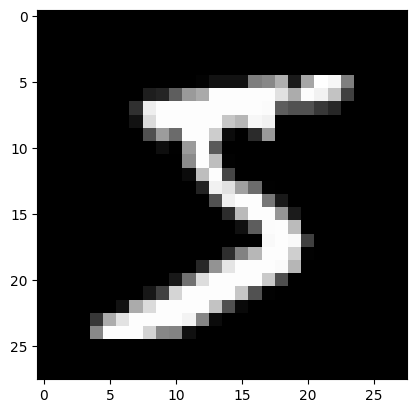

In [13]:
plt.imshow(train_X[0], cmap='gray')

Text(0.5, 1.0, 'Label: 5')

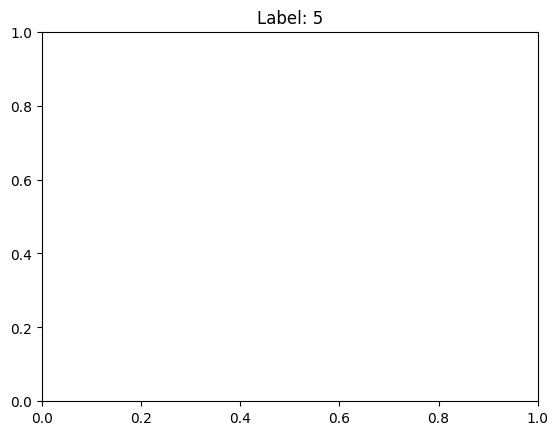

In [14]:
plt.title(f'Label: {train_y[0]}')

In [15]:
plt.show()

**Data Visualization**

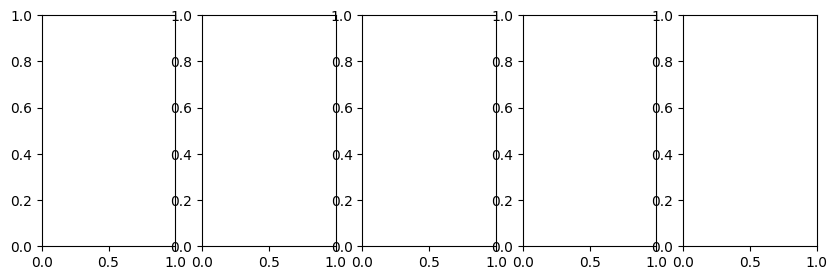

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

In [17]:
for i in range(5):
    axes[i].imshow(train_X[i], cmap='gray')
    axes[i].set_title(f'Label: {train_y[i]}')
    axes[i].axis('off')
plt.show()

**Data Preprocessing**

In [18]:
train_X_flat = train_X.reshape(train_X.shape[0], -1)

In [19]:
test_X_flat = test_X.reshape(test_X.shape[0], -1)

**Normalize the pixel values**

In [20]:
train_X_flat = train_X_flat / 255.0

In [21]:
test_X_flat = test_X_flat / 255.0

 **Define Target Variable (y) and Feature Variables (X)**

In [22]:
X = train_X_flat

In [23]:
y = train_y

**Train Test Split**

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Modeling**

In [25]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', n_jobs=-1)

In [26]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


LogisticRegression(max_iter=1000, n_jobs=-1)

**Model Evaluation**

In [27]:
y_val_pred = model.predict(X_val)

In [28]:
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Accuracy: 0.9224166666666667


In [29]:
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Confusion Matrix:
 [[1138    0    7    1    3    7    7    4    6    2]
 [   0 1281   10    3    2    5    1    3   14    3]
 [   3   19 1052   16   14    7   17   16   24    6]
 [   4    8   34 1088    1   35    2   11   21   15]
 [   1    2    5    2 1106    2   10    3    7   38]
 [  15    9   14   29    9  977   11    4   29    7]
 [   9    2   16    1    9   17 1117    2    4    0]
 [   5    8   17    8    9    2    0 1207    5   38]
 [  10   16   14   34    8   35   12    4 1014   13]
 [   5    5    6   10   24   11    0   36    8 1089]]


In [30]:
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.88      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.94      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.91      0.91      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



**Prediction**

In [31]:
y_test_pred = model.predict(test_X_flat)

In [32]:
print("Test Accuracy:", accuracy_score(test_y, y_test_pred))

Test Accuracy: 0.9248


In [33]:
print("Confusion Matrix:\n", confusion_matrix(test_y, y_test_pred))

Confusion Matrix:
 [[ 961    0    1    3    1    5    5    3    1    0]
 [   0 1113    3    2    0    1    4    1   11    0]
 [   7   11  922   18    9    4   14   11   32    4]
 [   4    1   17  921    1   22    4   11   22    7]
 [   1    4    5    3  918    0   10    6    7   28]
 [   8    2    3   38   11  774   15    6   30    5]
 [   9    3    7    2    6   17  911    2    1    0]
 [   0    8   24    8    6    1    0  948    1   32]
 [   8   10    7   23    8   26    9    9  862   12]
 [   8    8    1    9   25    7    1   23    9  918]]


In [34]:
print("Classification Report:\n", classification_report(test_y, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



**Explanation:**

**The logistic regression model was chosen for its simplicity and interpretability.
 The MNIST dataset was split into training and validation sets to train and evaluate the model.
 The images were flattened and normalized before training.
 The model achieved a reasonable accuracy on both validation and test sets.
This project demonstrates the steps to preprocess image data and train a basic classifier for handwritten digit recognition.**